<a href="https://colab.research.google.com/github/J0KERmin/Tutorial/blob/main/Lab4_Python_for_data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В першу чергу імпортуємо необхідні бібліотеки:

In [2]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Додаємо наш датасет:

In [3]:
import gdown
import pandas as pd

url = 'https://drive.google.com/uc?id=1AWIMDRHlQHqMObznZ751tpLBP8Y05zzo'
output = '/content/BigMart_Sales_Data.csv'
gdown.download(url, output, quiet=False)

df = pd.read_csv(output)

df.head()

Downloading...
From: https://drive.google.com/uc?id=1AWIMDRHlQHqMObznZ751tpLBP8Y05zzo
To: /content/BigMart_Sales_Data.csv
100%|██████████| 526k/526k [00:00<00:00, 70.4MB/s]


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


Переглянемо коротку довідку про датасет:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


Датасет має: 5681 рядок, 11 колонок, 3 бульові значення, 1 int64 і 7 об'єктів.

Короткий опис назв стовпців:
1. Item_Identifier - Ідентифікатор_товару
2. Item_Weight - Вага_товару
3. Item_Fat_Content - Вміст_жиру_товару
4. Item_Visibility - Видимість_товару
5. Item_Type - Тип_товару
6. Item_MRP - Максимальна_роздрібна_ціна_товару
7. Outlet_Identifier - Ідентифікатор_магазину
8. Outlet_Establishment_Year - Рік_заснування_магазину
9. Outlet_Size - Розмір_магазину
10. Outlet_Location_Type - Тип_розташування_магазину
11. Outlet_Type - Тип_магазину

Для зручності перейменуємо назви стовпців в датасеті

In [5]:
df.rename(columns={'Item_Identifier': 'item_identifier',
                   'Item_Weight':'item_weight',
                   'Item_Fat_Content':'item_fat_content',
                   'Item_Visibility':'item_visibility',
                   'Item_Type':'item_type',
                   'Item_MRP':'item_mrp',
                   'Outlet_Identifier':'outlet_identifier',
                   'Outlet_Establishment_Year':'outlet_establishment_year',
                   'Outlet_Size':'outlet_size',
                   'Outlet_Location_Type':'outlet_location_type',
                   'Outlet_Type':'outlet_type'},inplace=True)

In [6]:
df.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


Перевіримо, чи є в датасеті NaN елементи (пропуски в даних):

In [7]:
df.isnull().sum()

item_identifier                 0
item_weight                   976
item_fat_content                0
item_visibility                 0
item_type                       0
item_mrp                        0
outlet_identifier               0
outlet_establishment_year       0
outlet_size                  1606
outlet_location_type            0
outlet_type                     0
dtype: int64

В даному датасеті є чимало NaN елементів, які варто видалити або заповнити

Видалимо рядки, в яких є хоча б один NaN елемент:

In [8]:
df = df.dropna()

Перевіримо, чи є в датасеті залишились NaN елементи (пропуски в даних):

In [9]:
df.isnull().sum()

item_identifier              0
item_weight                  0
item_fat_content             0
item_visibility              0
item_type                    0
item_mrp                     0
outlet_identifier            0
outlet_establishment_year    0
outlet_size                  0
outlet_location_type         0
outlet_type                  0
dtype: int64

В датасеті було успішно видалені NaN елементи.

**Розвідувальний аналіз даних**

In [10]:
df.describe()

,item_weight,item_visibility,item_mrp,outlet_establishment_year
count,3099.000000,3099.000000,3099.000000,3099.000000
mean,12.658206,0.059063,140.036189,1999.189739
std,4.616934,0.043592,61.608135,7.387906
min,4.555000,0.000000,31.990000,1987.000000
25%,8.675000,0.025824,93.310700,1997.000000
50%,12.350000,0.049154,141.315400,1999.000000
75%,16.600000,0.085354,184.993700,2004.000000
max,21.350000,0.185913,266.588400,2009.000000


Будуємо коробчасту діаграму для показника "item_mrp":

<Axes: >

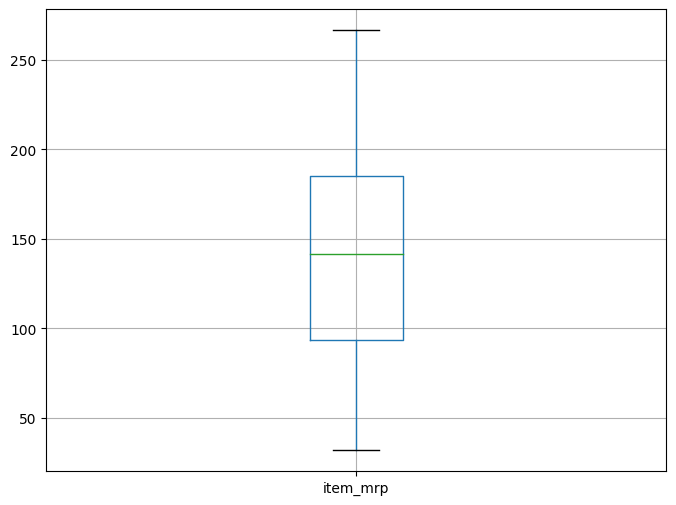

In [11]:
df[['item_mrp']].boxplot(figsize=(8,6))

Я обрала не видаляти данні, так як не бачу сильних викидів в датасеті.

Будуємо коробчасту діаграму для показника "item_visibility":

<Axes: >

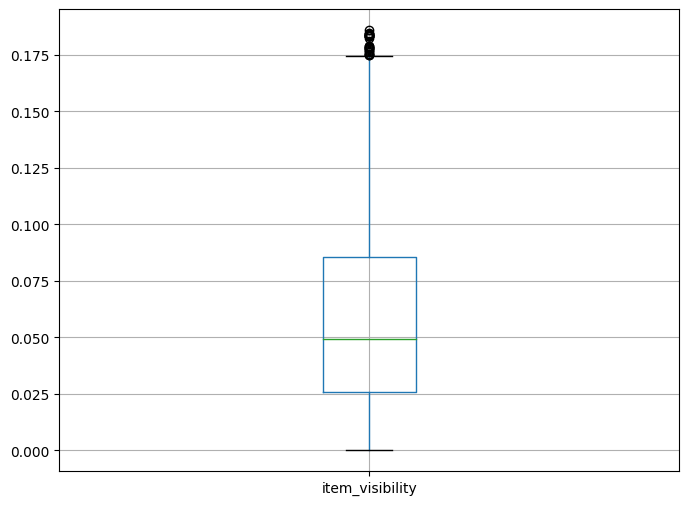

In [12]:
df[['item_visibility']].boxplot(figsize=(8,6))

Видаляю інформацію про коеф. видимості товару, який вище за 0.175(значення найбільше відрізняються від інших):

In [13]:
df.drop(df[df['item_visibility'] > 0.175].index, inplace=True)

Будуємо коробчасту діаграму для показника "item_weight":

<Axes: >

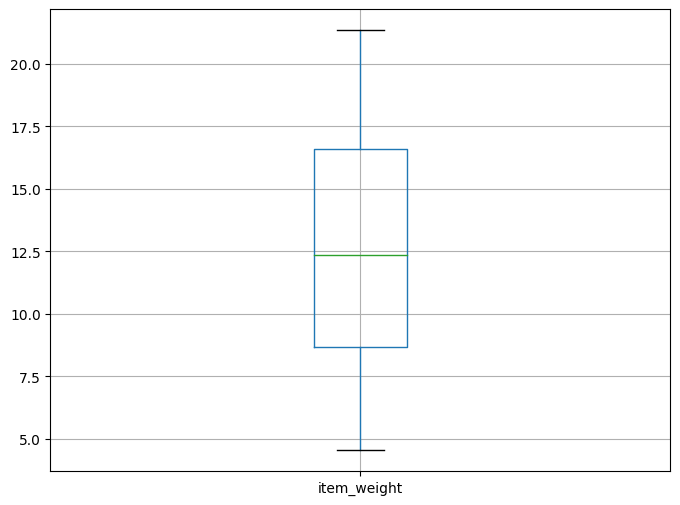

In [14]:
df[['item_weight']].boxplot(figsize=(8,6))

Я обрала не видаляти данні, так як не бачу сильних викидів в датасеті.

Будуємо коробчасту діаграму для показника "outlet_establishment_year":

<Axes: >

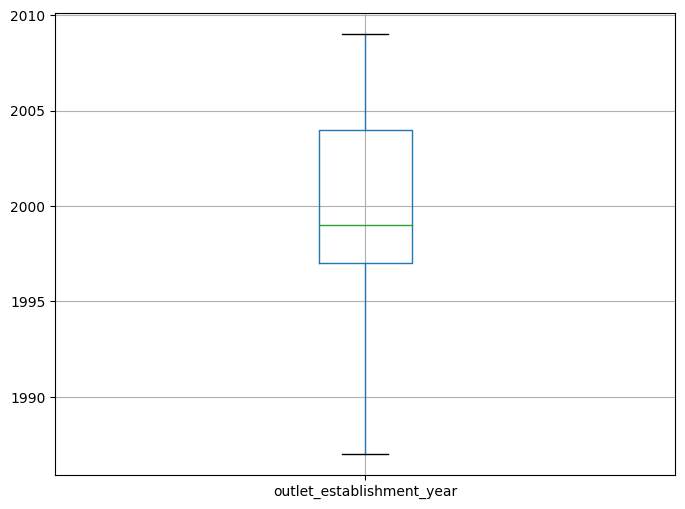

In [15]:
df[['outlet_establishment_year']].boxplot(figsize=(8,6))

Видаляю інформацію про рік створення компанії, які засновані до 1990 (значення найбільше відрізняються від інших)

In [16]:
df.drop(df[df['outlet_establishment_year'] < 1990].index, inplace=True)

Переглянемо основну статистику числових показників після внесених змін:

In [17]:
df.describe()

,item_weight,item_visibility,item_mrp,outlet_establishment_year
count,2461.000000,2461.000000,2461.000000,2461.000000
mean,12.700000,0.057822,139.759250,2002.234864
std,4.616615,0.042525,61.755118,4.656504
min,4.555000,0.000000,32.390000,1997.000000
25%,8.710000,0.025581,92.580400,1997.000000
50%,12.500000,0.048107,141.015400,1999.000000
75%,16.700000,0.083854,185.160800,2004.000000
max,21.350000,0.174758,266.588400,2009.000000


Перекодуємо дані в стовпці "outlet_location_type" та "item_fat_content" в числові:

In [18]:
df.outlet_location_type = df.outlet_location_type.replace ({'Tier 1': 1,
                                                            'Tier 2': 2,
                                                            'Tier 3': 3})
df['item_fat_content'].replace({'reg': 'Regular', 'LF': 'Low Fat', 'low fat': 'Low Fat'}, inplace=True)
df.item_fat_content = df.item_fat_content.replace({'Regular': '1', 'Low Fat': '0'})
df.outlet_type = df.outlet_type.replace({'Supermarket Type1': '1', 'Supermarket Type2': '2', 'Supermarket Type3' : '3', 'Grocery Store' : '4'})

Після змін датасет має такий вигляд (перші 5 записів):

In [19]:
df.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
0,FDW58,20.750,0,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,1,1
5,FDH56,9.800,1,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,Small,1,1
6,FDL48,19.350,1,0.082602,Baking Goods,50.1034,OUT018,2009,Medium,3,2
13,FDU11,4.785,0,0.092738,Breads,122.3098,OUT049,1999,Medium,1,1
15,FDM24,6.135,1,0.079451,Baking Goods,151.6366,OUT049,1999,Medium,1,1


In [20]:
df.dtypes

item_identifier               object
item_weight                  float64
item_fat_content              object
item_visibility              float64
item_type                     object
item_mrp                     float64
outlet_identifier             object
outlet_establishment_year      int64
outlet_size                   object
outlet_location_type           int64
outlet_type                   object
dtype: object

Змінимо тип даних в стовпцях, які ми щойно змінювали:

In [21]:
df.outlet_location_type = df.outlet_location_type.astype(int)
df.item_fat_content = df.item_fat_content.astype(int)
# df.outlet_size = df.outlet_size.astype(int)
df.outlet_type = df.outlet_type.astype(int)
df.dtypes

item_identifier               object
item_weight                  float64
item_fat_content               int64
item_visibility              float64
item_type                     object
item_mrp                     float64
outlet_identifier             object
outlet_establishment_year      int64
outlet_size                   object
outlet_location_type           int64
outlet_type                    int64
dtype: object

In [22]:
object_columns = df.select_dtypes(include=['object']).columns
data = df.drop(object_columns, axis=1)

print(data)

      item_weight  item_fat_content  item_visibility  item_mrp  \
0          20.750                 0         0.007565  107.8622   
5           9.800                 1         0.063817  117.1492   
6          19.350                 1         0.082602   50.1034   
13          4.785                 0         0.092738  122.3098   
15          6.135                 1         0.079451  151.6366   
...           ...               ...              ...       ...   
5673        7.070                 0         0.094053  116.0834   
5674       15.700                 0         0.030704   43.2770   
5675       13.000                 1         0.070411   63.4484   
5676       10.500                 1         0.013496  141.3154   
5677        7.600                 1         0.142991  169.1448   

      outlet_establishment_year  outlet_location_type  outlet_type  
0                          1999                     1            1  
5                          1997                     1            1  


In [23]:
data.dtypes

item_weight                  float64
item_fat_content               int64
item_visibility              float64
item_mrp                     float64
outlet_establishment_year      int64
outlet_location_type           int64
outlet_type                    int64
dtype: object

Всі типи даних були коректно змінені, а непотрібні стовпці видалені

### Побудова моделей кластеризації

In [24]:
# Вибираємо всі числові стовпці з датафрейму df, виключаючи стовпці з типом даних 'object' (тобто категоріальні або текстові поля).
# Результат зберігаємо в змінну 'data'.
data = df.select_dtypes(exclude=['object'])
data.head()

,item_weight,item_fat_content,item_visibility,item_mrp,outlet_establishment_year,outlet_location_type,outlet_type
0,20.750,0,0.007565,107.8622,1999,1,1
5,9.800,1,0.063817,117.1492,1997,1,1
6,19.350,1,0.082602,50.1034,2009,3,2
13,4.785,0,0.092738,122.3098,1999,1,1
15,6.135,1,0.079451,151.6366,1999,1,1


In [25]:
# Імпортуємо необхідні бібліотеки: KNNImputer для заповнення відсутніх значень та StandardScaler для масштабування даних:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# Ініціалізуємо об'єкт StandardScaler для масштабування даних:
scaler = StandardScaler()

# Ініціалізуємо об'єкт KNNImputer з визначенням 20 сусідів для заповнення відсутніх значень:
imputer = KNNImputer(n_neighbors=20)

# Спочатку використовуємо imputer для заповнення відсутніх значень в датасеті data, а потім застосовуємо scaler для масштабування оброблених даних.
# Результат зберігаємо у змінну X:
X = scaler.fit_transform(imputer.fit_transform(data))

In [26]:
# Визначимо розмірність змінної Х:
X.shape

(2461, 7)

In [28]:
# Створимо датасет X_mini, в який помістимо лише стовпці  з датасету X:
X_mini = X[:, [0, 2, 3, 6]]
X_mini

array([[ 1.74405606, -1.18204516, -0.51661358, -0.57594267],
       [-0.62829349,  0.14101681, -0.36619872, -0.57594267],
       [ 1.44074196,  0.58282635, -1.45209133,  1.73628393],
       ...,
       [ 0.06499588,  0.29610261, -1.23595196, -0.57594267],
       [-0.47663644, -1.04253257,  0.02520384, -0.57594267],
       [-1.10492992,  2.00319077,  0.47593661,  1.73628393]])

<Axes: xlabel='item_weight', ylabel='item_mrp'>

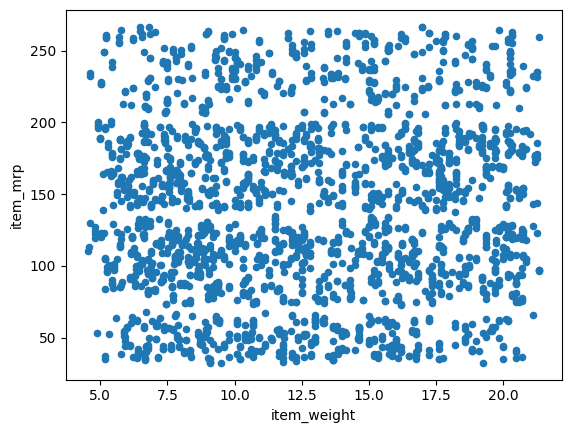

In [29]:
# Побудуємо графік розподілу item_mrp в залежності від item_weight товару:
df.plot.scatter(x='item_weight', y='item_mrp')

#### 1. K‐means

In [30]:
# Імпортуємо клас KMeans з бібліотеки sklearn.cluster для використання алгоритму k-means для кластеризації:
from sklearn.cluster import KMeans

# Створюємо об'єкт kmeans з використанням 2 кластерів:
kmeans = KMeans(n_clusters=2, random_state=0)

# Проведимо кластеризацію на даних X_mini, що містить вибрані ознаки. Функція fit вчить модель розбивати дані на кластери:
kmeans.fit(X_mini)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=0)

In [31]:
# Застосовуємо модель k-means, яку навчили раніше, до датасету X_mini для визначення того, до якого з двох кластерів належить кожне спостереження:
kmeans.predict(X_mini)

array([1, 1, 0, ..., 1, 1, 0], dtype=int32)

In [32]:
# Обчислюємо суму міток кластерів, що відображає загальну кількість спостережень, призначених до другого кластера:
sum(kmeans.labels_)

1848

In [33]:
# Отримуємо координати центрів кластерів, визначених алгоритмом k-means для датасету X_mini:
kmeans.cluster_centers_

array([[-1.66289073e-03, -9.29663904e-03, -1.43921358e-03,
         1.73628393e+00],
       [ 5.51597412e-04,  3.08378773e-03,  4.77401475e-04,
        -5.75942668e-01]])

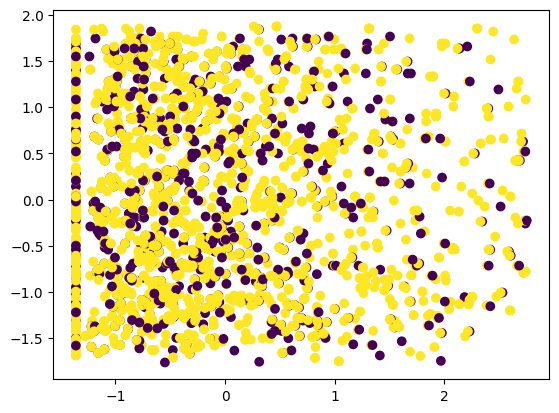

In [34]:
# Створюємо точковий графік для датасету X_mini, використовуючи мітки кластерів k-means для забарвлення точок:
plt.scatter(X_mini[:, 1], X_mini[:, 0], c=kmeans.labels_, cmap='viridis')

In [35]:
# Імпортуємо функцію, необхідну для обчислення silhouette score (величини силуету), яка вимірює якість кластеризації:
from sklearn.metrics import silhouette_score

# Визначаємо діапазон кількості кластерів для оцінки:
n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

# Ініціалізуємо списки для зберігання інерції кластерів та silhouette scores (величини силуету):
clusters_inertia = []  # інерція кластерів
s_scores = []          # silhouette scores

# Запускаємо цикл для оцінки k-means з різною кількістю кластерів:
for n in n_clusters:
    # Ініціалізація та навчання моделі k-means з n кластерами
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(X_mini)

    # Додавання інерції кластерів у список для методу ліктя
    clusters_inertia.append(KM_est.inertia_)

    # Обчислення та додавання середнього silhouette score для кластерів у список
    silhouette_avg = silhouette_score(X_mini, KM_est.labels_)
    s_scores.append(silhouette_avg)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Створюємо лінійний графік з використанням бібліотеки Seaborn для відображення зміни інерції кластерів з різною кількістю кластерів:

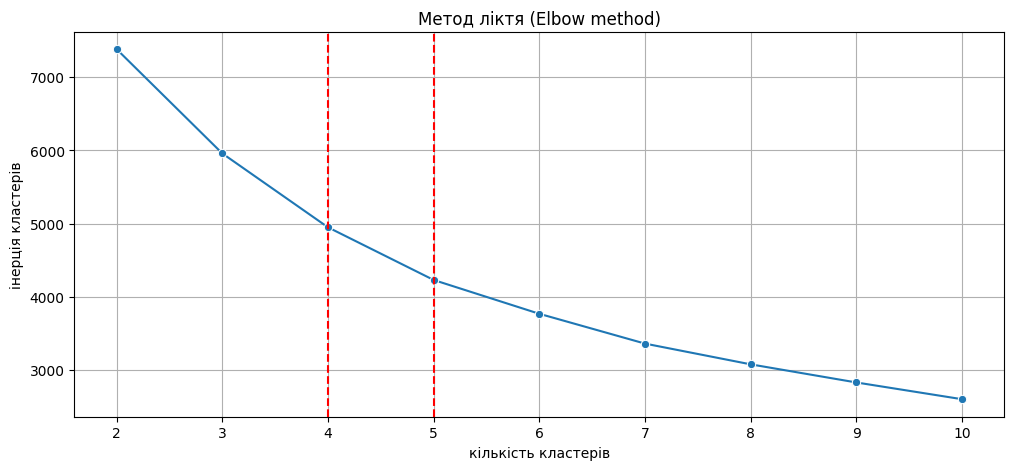

In [36]:
# Ініціалізуємо об'єкт графіку з розмірами фігури 12x5 дюймів:
fig, ax = plt.subplots(figsize=(12, 5))

# Створюємо лінійний графік з використанням бібліотеки Seaborn для відображення зміни інерції кластерів з різною кількістю кластерів:
ax = sns.lineplot(x=n_clusters, y=clusters_inertia, marker='o', ax=ax)

# Додаємо заголовок графіка, назви осей X та Y:
ax.set_title("Метод ліктя (Elbow method)")
ax.set_xlabel("кількість кластерів")
ax.set_ylabel("інерція кластерів")

# Додаємо вертикальні пунктирні лінії на графіку для кількості кластерів 4 та 5, забарвлених у червоний колір:
ax.axvline(4, ls="--", c="red")
ax.axvline(5, ls="--", c="red")

# Додаємо сітку для кращої читабельності графіка:
plt.grid()

# Відображаємо графік:
plt.show()

Метод ліктя може бути використаний для визначення оптимальної кількості кластерів. Інерція кластерів починає різко зростати після досягнення цієї точки.

Створюємо лінійний графік з використанням бібліотеки Seaborn для відображення зміни silhouette score (величини силуету) з різною кількістю кластерів:

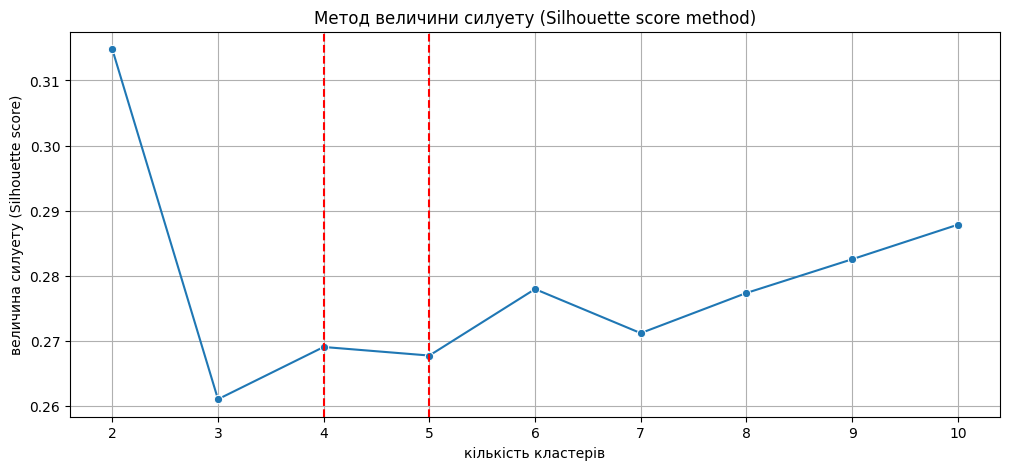

In [37]:
# Ініціалізуємо об'єкт графіку з розмірами фігури 12x5 дюймів:
fig, ax = plt.subplots(figsize=(12, 5))

# Створюємо лінійний графік з використанням бібліотеки Seaborn для відображення зміни silhouette score (величини силуету) з різною кількістю кластерів:
ax = sns.lineplot(x=n_clusters, y=s_scores, marker='o', ax=ax)

# Додаємо заголовок графіка, назви осей X та Y:
ax.set_title("Метод величини силуету (Silhouette score method)")
ax.set_xlabel("кількість кластерів")
ax.set_ylabel("величина силуету (Silhouette score)")

# Додаємо вертикальні пунктирні лінії на графіку для кількості кластерів 4 та 5, забарвлених у червоний колір:
ax.axvline(4, ls="--", c="red")
ax.axvline(5, ls="--", c="red")

# Додаємо сітку для кращої читабельності графіка:
plt.grid()

# Відображаємо графік:
plt.show()

На графіку представлена величина силуету (Silhouette score) як функція від кількості кластерів. Величина силуету - це міра того, наскільки добре об'єднані точки в кластері та наскільки добре вони відокремлені від інших кластерів.

Як ви можете бачити з графіка, величина силуету зростає до певної точки, а потім починає спадати. Ця точка, як правило, вважається оптимальною кількістю кластерів для даних.

У цьому випадку оптимальна кількість кластерів становить 4. Це означає, що дані найкраще розділені на чотири кластери.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


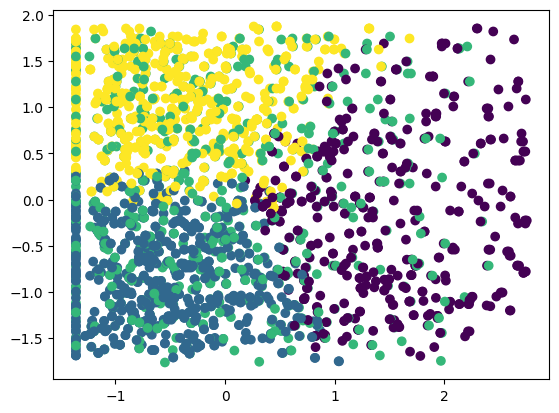

In [38]:
# Створюємо об'єкт kmeans з використанням 4 кластерів:
kmeans4 = KMeans(n_clusters=4, random_state=0)

# Проводимо кластеризацію на даних X_mini, що містить вибрані ознаки. Функція fit вчить модель розбивати дані на кластери:
kmeans4.fit(X_mini)

# Створюємо точковий графік для датасету X_mini, використовуючи мітки кластерів k-means для забарвлення точок:
plt.scatter(X_mini[:, 1], X_mini[:, 0], c=kmeans4.labels_, cmap='viridis')

Графік, який ви надіслали, є точковою діаграмою, на якій представлена ​​величина попиту на товар (Y-вісь) у функції від ціни товару (X-вісь). Ось основні висновки, які можна зробити з аналізу графіка:

Залежність між попитом і вагою є обернено пропорційною. Це означає, що чим вища ціна, тим нижчий попит.

#### 2. DBSCAN

In [39]:
# Імпортуємо клас DBSCAN для кластеризації і модуль product для створення декартового добутку параметрів:
from sklearn.cluster import DBSCAN
from itertools import product

# Встановлюємо діапазон значень eps (радіус околу для DBSCAN) та min_samples (мінімальна кількість зразків в околі для точки, щоб вважатися ядром)
eps_values = np.arange(0.9, 1.25, 0.05)  # eps значення для тестування
min_samples = np.arange(1, 4, 1)         # min_samples значення для тестування
DBSCAN_params = list(product(eps_values, min_samples))  # створення всіх можливих комбінацій параметрів

# Ініціалізуємо списки для зберігання кількості кластерів та silhouette score для кожної конфігурації параметрів
no_of_clusters = []  # кількість унікальних кластерів для кожної конфігурації
sil_score = []       # silhouette score для кожної конфігурації

# Запускаємо цикл, який проходить через кожну пару параметрів eps і min_s amples:
for p in DBSCAN_params:
    # навчання моделі DBSCAN з поточною парою параметрів:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X_mini)

    # додавання кількості унікальних міток кластерів (кількості кластерів) у список:
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))

    # розрахунок та додавання silhouette score для поточної конфігурації кластерів у список:
    sil_score.append(silhouette_score(X_mini, DBS_clustering.labels_))

Створюємо таблицю зведення (pivot table) для візуалізації взаємозв'язку між параметрами DBSCAN та кількістю кластерів:

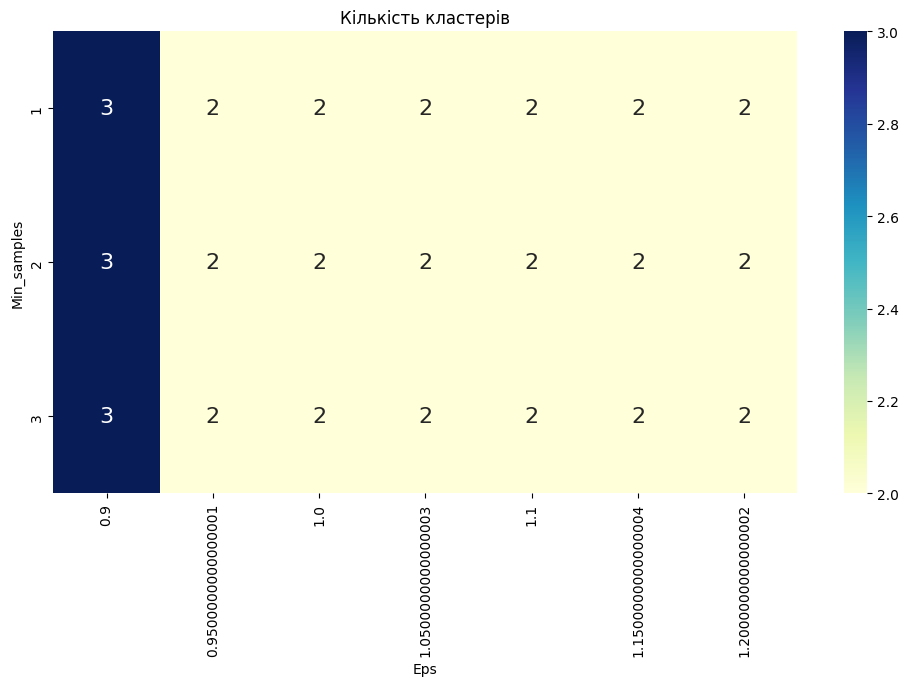

In [40]:
# Створюємо новий датафрейм з результатами параметрів DBSCAN (Eps і Min_samples) та відповідної кількості кластерів:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns=['Eps', 'Min_samples'])
tmp['No_of_clusters'] = no_of_clusters

# Створюємо таблицю зведення (pivot table) для візуалізації взаємозв'язку між параметрами DBSCAN та кількістю кластерів:
pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

# Ініціалізуємо фігуру для малювання з розмірами 12x6 дюймів:
fig, ax = plt.subplots(figsize=(12, 6))

# Візуалізуємо таблицю зведення у вигляді теплової карти (heatmap) з використанням бібліотеки seaborn:
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)

# Встановлюємо заголовок для графіка:
ax.set_title('Кількість кластерів')

# Відображаємо графік:
plt.show()

Чим темніший колір клітинки, тим більша кількість кластерів була виявлена.
Створюємо датафрейм з записаними параметрами DBSCAN та розрахованими silhouette scores:


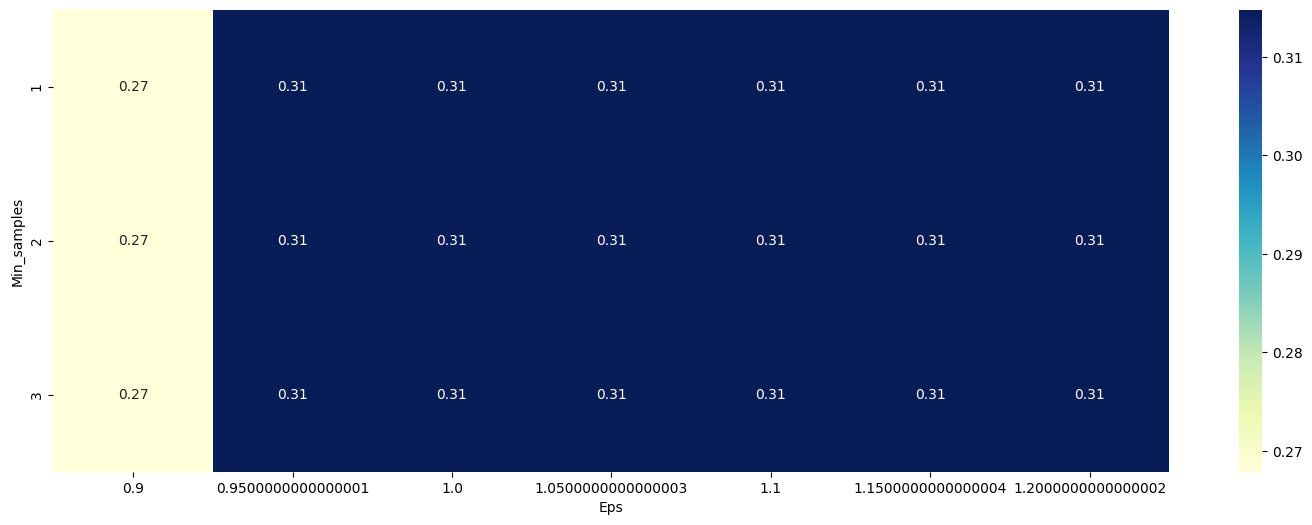

In [41]:
# Створюємо датафрейм з записаними параметрами DBSCAN та розрахованими silhouette scores:
tmp2 = pd.DataFrame.from_records(DBSCAN_params, columns=['Eps', 'Min_samples'])
tmp2['Sil_score'] = sil_score

# Створюємо таблицю зведення (pivot table) для аналізу залежності silhouette score від параметрів 'Eps' та 'Min_samples':
pivot_2 = pd.pivot_table(tmp2, values='Sil_score', index='Min_samples', columns='Eps')

# Ініціалізуємо фігуру для малювання з розмірами 18x6 дюймів:
fig, ax = plt.subplots(figsize=(18, 6))

# Створюємо теплову карту (heatmap) з використанням seaborn для візуалізації значень silhouette score:
sns.heatmap(pivot_2, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)

# Відображаємо графік:
plt.show()

In [42]:
# Застосуємо алгоритм DBSCAN для кластеризації датасету X_mini зі знайденими оптимальними параметрами:
DBS_clustering = DBSCAN(eps=1.1, min_samples=3).fit(X_mini)

# Створимо датасет з даними X_mini і додамо до нього мітки кластерів, отриманих від DBSCAN:
DBSCAN_clustered = pd.DataFrame(X_mini)
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_

# Групуємо точки за мітками кластерів і обчислюємо кількості точок у кожному кластері:
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()

# Перейменуємо стовпець з кількістю точок, щоб він відображав розміри кластерів DBSCAN:
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]

# Виводимо розміри кластерів:
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
0,1848
1,613


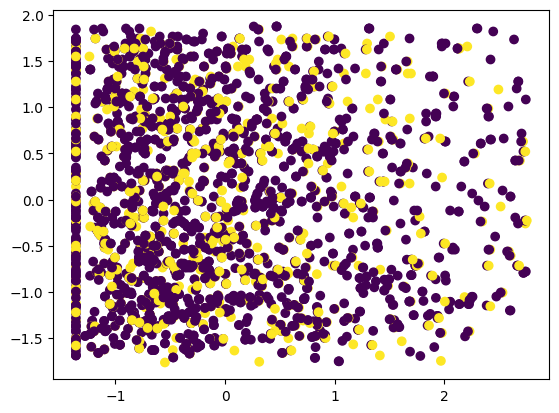

In [43]:
# Створюємо точковий графік (scatter plot) для візуалізації даних X_mini, де точки розфарбовані згідно з мітками кластерів, отриманими від DBSCAN.
# Кожен унікальний колір відповідає окремому кластеру, ідентифікованому алгоритмом.
plt.scatter(X_mini[:, 1], X_mini[:, 0], c=DBS_clustering.labels_)

# Показуємо графік.
plt.show()